# **Analysis of Covid19 data set (Germany)**
Source of data set: Kaggle, https://www.kaggle.com/headsortails/covid19-tracking-germany



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# import data set
covid = pd.read_csv('Covid19_Dataset.csv')
covid.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-05-08,1,0,0
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,2020-03-17,1,0,1


**Overall inspection of data set:**

In [6]:
# get an overview over the dataset
covid.describe()

,cases,deaths,recovered
count,74636.000000,74636.000000,74636.000000
mean,2.323852,0.105552,2.043049
std,2.793175,0.412644,2.757691
min,0.000000,0.000000,-1.000000
25%,1.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000
75%,3.000000,0.000000,2.000000
max,69.000000,11.000000,68.000000


In [7]:
# check variable types
covid.dtypes

state        object
county       object
age_group    object
gender       object
date         object
cases         int64
deaths        int64
recovered     int64
dtype: object

In [8]:
# convert 'date' to timeseries
covid['date'] = pd.to_datetime(covid['date'])
covid.dtypes

state                object
county               object
age_group            object
gender               object
date         datetime64[ns]
cases                 int64
deaths                int64
recovered             int64
dtype: object

In [9]:
# check date range
print(min(covid['date']))

2020-01-28 00:00:00


In [10]:
print(max(covid['date']))

2020-05-14 00:00:00


In [11]:
# set state as index
covid.set_index('state')
covid.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-05-08,1,0,0
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,2020-03-17,1,0,1


In [12]:
# Are there values missing?
covid.isna().sum()  

state          0
county         0
age_group    111
gender       320
date           0
cases          0
deaths         0
recovered      0
dtype: int64

In [13]:
# are all observations Covid19 cases (=1)?
(covid['cases'] == 0).sum()

17

In [14]:
# print all observations which are no Covid19 case
covid[covid['cases'] == 0]

,state,county,age_group,gender,date,cases,deaths,recovered
4084,Baden-Wuerttemberg,LK Karlsruhe,35-59,F,2020-05-01,0,0,0
4089,Baden-Wuerttemberg,LK Karlsruhe,35-59,M,2020-03-11,0,0,0
6193,Baden-Wuerttemberg,LK Ostalbkreis,35-59,F,2020-04-18,0,0,0
7311,Baden-Wuerttemberg,LK Reutlingen,05-14,M,2020-03-30,0,0,0
7431,Baden-Wuerttemberg,LK Reutlingen,35-59,F,2020-04-10,0,0,0
7519,Baden-Wuerttemberg,LK Reutlingen,60-79,F,2020-03-18,0,0,0
7789,Baden-Wuerttemberg,LK Rhein-Neckar-Kreis,15-34,M,2020-05-11,0,0,0
8603,Baden-Wuerttemberg,LK Schwarzwald-Baar-Kreis,15-34,F,2020-03-20,0,0,0
23457,Bayern,LK Rhoen-Grabfeld,35-59,M,2020-04-28,0,0,0
25110,Bayern,LK Straubing-Bogen,35-59,F,2020-04-05,0,0,0


**Analysis for Germany (all states)**


In [15]:
# Sum of all cases in Germany in the given time range
covid['cases'].sum()

173443

In [16]:
# Sum of all deaths in Germany in the given time range
covid['deaths'].sum()

7878

In [17]:
# Sum of all recovered cases in Germany in the given time range
covid['recovered'].sum()

152485

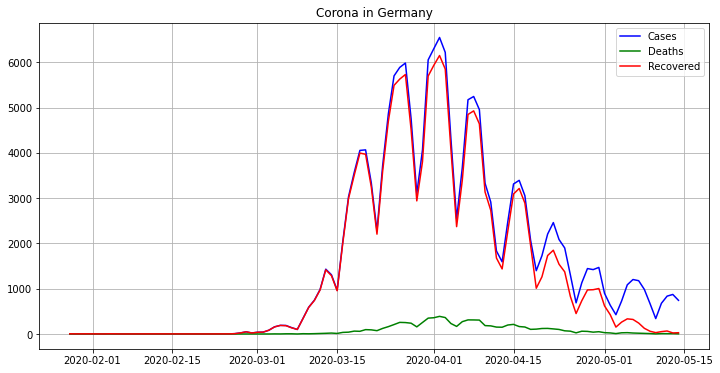

In [18]:
# plot the cases/deaths/recovered in Germany
ger = covid.groupby('date').sum()

plt.figure(figsize=(12,6))
plt.plot(ger.index, ger.cases, label='Cases', color='b')
plt.plot(ger.index, ger.deaths, label='Deaths', color='g')
plt.plot(ger.index, ger.recovered, label='Recovered', color='r')

plt.legend()
plt.title("Corona in Germany")
plt.grid()
plt.show()

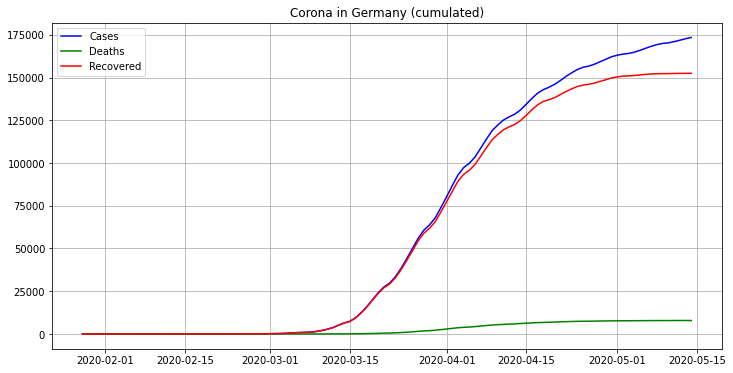

In [19]:
# plot cumulated cases in Germany
ger_cum = np.cumsum(ger)

plt.figure(figsize=(12,6))
plt.plot(ger_cum.index, ger_cum.cases, label='Cases', color='b')
plt.plot(ger_cum.index, ger_cum.deaths, label='Deaths', color='g')
plt.plot(ger_cum.index, ger_cum.recovered, label='Recovered', color='r')

plt.legend()
plt.title("Corona in Germany (cumulated)")
plt.grid()
plt.show()

In [20]:
age = covid.groupby(['age_group']).sum()
age.head()

,cases,deaths,recovered
age_group,,,
00-04,1648,1,1379
05-14,3860,0,3462
15-34,43177,16,39766
35-59,72311,338,67466
60-79,32704,2490,27788


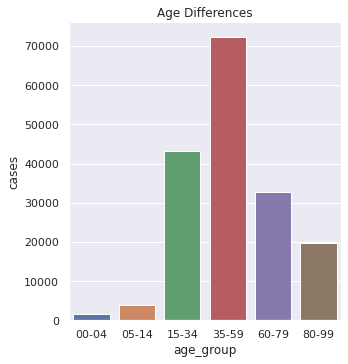

In [21]:
# plot differences in age (all states)
sns.set(font_scale=1)
sns.catplot( x= 'age_group', y = 'cases', kind= 'bar', data = age.reset_index()).set(title = 'Age Differences')

In [22]:
# compare gender
gender = covid.groupby(['gender']).sum()
gender.head()

,cases,deaths,recovered
gender,,,
F,90503,3502,80227
M,82568,4371,71949


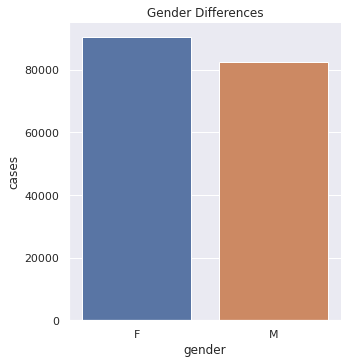

In [23]:
# plot gender
sns.catplot( x= 'gender', y = 'cases', kind= 'bar', data = gender.reset_index()).set(title = 'Gender Differences')

**Analysis per state in Germany**

In [24]:
# Sum of cases/deaths/recovered for all states
state_sum = covid.groupby(['state']).sum()
print(state_sum)

                        cases  deaths  recovered
state                                           
Baden-Wuerttemberg      33808    1644      29797
Bayern                  45251    2273      39698
Berlin                   6421     181       5790
Brandenburg              3168     149       2769
Bremen                   1129      37        805
Hamburg                  5015     231       4492
Hessen                   9231     432       7972
Mecklenburg-Vorpommern    745      20        689
Niedersachsen           11088     535       9704
Nordrhein-Westfalen     36010    1499      31743
Rheinland-Pfalz          6442     216       5847
Saarland                 2687     149       2436
Sachsen                  5083     195       4450
Sachsen-Anhalt           1675      54       1494
Schleswig-Holstein       2994     126       2606
Thueringen               2696     137       2193


In [0]:
# visualize state_sum (only cases)
sns.set(font_scale=4)
sns.catplot(y = 'state', x = 'cases', height=30, aspect=3, kind= 'bar', data=state_sum.reset_index()).set(title = 'State Differences (Cases)')

In [0]:
# visualize state_sum (only deaths)
sns.catplot(y = 'state', x = 'deaths',  height=30, aspect=3, kind= 'bar', data=state_sum.reset_index()).set(title = 'State Differences (Deaths)')

In [0]:
# split data by state
bw = covid[covid['state'] == 'Baden-Wuerttemberg']
by = covid[covid['state'] == 'Bayern']
be = covid[covid['state'] == 'Berlin']
bra = covid[covid['state'] == 'Brandenburg']
bre = covid[covid['state'] == 'Bremen']
ha = covid[covid['state'] == 'Hamburg']
he = covid[covid['state'] == 'Hessen']
mv = covid[covid['state'] == 'Mecklenburg-Vorpommern']
ni = covid[covid['state'] == 'Niedersachsen']
nrw = covid[covid['state'] == 'Nordrhein-Westfalen']
rp = covid[covid['state'] == 'Rheinland-Pfalz']
sar = covid[covid['state'] == 'Saarland']
sac = covid[covid['state'] == 'Sachsen']
saa = covid[covid['state'] == 'Sachsen-Anhalt']
sh = covid[covid['state'] == 'Schleswig-Holstein']
th = covid[covid['state'] == 'Thueringen']

In [0]:
# group state data by date
bw = bw.groupby('date').sum()
by = by.groupby('date').sum()
be = be.groupby('date').sum()
bra = bra.groupby('date').sum()
bre = bre.groupby('date').sum()
ha = ha.groupby('date').sum()
he = he.groupby('date').sum()
mv = mv.groupby('date').sum()
ni = ni.groupby('date').sum()
nrw = nrw.groupby('date').sum()
rp = rp.groupby('date').sum()
sar = sar.groupby('date').sum()
sac = sac.groupby('date').sum()
saa = saa.groupby('date').sum()
sh = sh.groupby('date').sum()
th = th.groupby('date').sum()

In [0]:
# we can now compare the daily cases in a plot
# examplarily 5 here
sns.set(font_scale=1)
plt.figure(figsize=(12,6))
plt.plot(bw.index, bw.cases, label='Baden Wuerttemberg', color='b')
plt.plot(by.index, by.cases, label='Bayern', color='g')
plt.plot(be.index, be.cases, label='Berlin', color='r')
plt.plot(bra.index, bra.cases, label='Brandenburg', color='orange')
plt.plot(bre.index, bre.cases, label='Bremen', color='pink')


plt.legend()
plt.title("Corona cases in German states")
plt.grid()
plt.show()

In [0]:
# cumultate cases per state
bw_cum = np.cumsum(bw)
by_cum = np.cumsum(by)
be_cum = np.cumsum(be)
bra_cum = np.cumsum(bra)
bre_cum = np.cumsum(bre)
ha_cum = np.cumsum(ha)
he_cum = np.cumsum(he)
mv_cum = np.cumsum(mv)
ni_cum = np.cumsum(ni)
nrw_cum = np.cumsum(nrw)
rp_cum = np.cumsum(rp)
sar_cum = np.cumsum(sar)
sac_cum = np.cumsum(sac)
saa_cum = np.cumsum(saa)
sh_cum = np.cumsum(sh)
th_cum = np.cumsum(th)

In [0]:
# plot cumulated cases per state

plt.figure(figsize=(12,6))
plt.plot(bw_cum.index, bw_cum.cases, label='Baden-Wuerttemberg', color='yellow')
plt.plot(by_cum.index, by_cum.cases, label='Bayern', color='g')
plt.plot(be_cum.index, be_cum.cases, label='Berlin', color='r')
plt.plot(bra_cum.index, bra_cum.cases, label='Brandenburg', color='pink')
plt.plot(bre_cum.index, bre_cum.cases, label='Bremen', color='orange')
plt.plot(ha_cum.index, ha_cum.cases, label='Hamburg', color='violet')
plt.plot(he_cum.index, he_cum.cases, label='Hessen', color='c')
plt.plot(mv_cum.index, mv_cum.cases, label='Mecklenburg-Vorpommern', color='m')
plt.plot(ni_cum.index, ni_cum.cases, label='Niedersachsen', color='y')
plt.plot(nrw_cum.index, nrw_cum.cases, label='NRW', color='purple')
plt.plot(rp_cum.index, rp_cum.cases, label='Rheinland-Pfalz', color='teal')
plt.plot(sar_cum.index, sar_cum.cases, label='Saarland', color='lightgreen')
plt.plot(sac_cum.index, sac_cum.cases, label='Sachsen', color='blue')
plt.plot(saa_cum.index, saa_cum.cases, label='Sachsenanhalt', color='peru')
plt.plot(sh_cum.index, sh_cum.cases, label='Schleswig-Holstein', color='slategrey')
plt.plot(th_cum.index, th_cum.cases, label='Thueringen', color='rosybrown')

plt.legend()
plt.title("Corona cases in German states (cumulated))")
plt.grid()
plt.show()

# **Analysis of Covid19 Cases in Hamburg**

In [0]:
# create data set for Hamburg
ham = covid[covid['state'] == 'Hamburg']
ham.head()

In [0]:
ham.shape

In [0]:
ham.describe()

In [0]:
# There are 5015 cases in Hamburg
ham['cases'].sum()

In [0]:
# ...and 231 deaths
ham['deaths'].sum()

In [0]:
# ...and 4492 recovered cases
ham['recovered'].sum()

In [0]:
# ... in the time from 28/02 to 14/05 in the data set
print(min(ham['date']))
print(max(ham['date']))

In [0]:
# compare age groups
ham_age = ham.groupby(['age_group']).sum()
sns.catplot( x= 'age_group', y = 'cases' ,kind= 'bar', data = ham_age.reset_index()).set(title = 'Age Differences')


In [0]:
# compare gender
ham_gender = ham.groupby(['gender']).sum()
sns.catplot( x= 'gender', y = 'cases', kind= 'bar', data = ham_gender.reset_index()).set(title = 'Gender Differences')

In [0]:
# Are there duplicates in the 'date' column?
duplicates = ham['date'].duplicated()
print(duplicates)

In [0]:
# sort ham_tp by 'date'
ham.sort_values(by=['date'], inplace=True)
ham.head()

In [0]:
# Group all cases/death/recovered per day
ham = ham.groupby('date').sum()
ham.head(20)

In [0]:
# find row number
ham.index.get_loc('2020-05-13')

In [0]:
# plot new cases/deaths/recovered per day in Hamburg
import matplotlib.dates as mdates
x = ham.index
y = ham.cases

plt.figure(figsize=(12,6))
plt.plot(ham.index, ham.cases, label='Cases', color='b')
plt.plot(ham.index, ham.deaths, label='Deaths', color='g')
plt.plot(ham.index, ham.recovered, label='Recovered', color='r')

plt.annotate('first restrictions', (mdates.date2num(x[14]), y[14]), xytext=(5, 30), 
             textcoords='offset points', arrowprops=dict(arrowstyle='-|>', color='black'), horizontalalignment='right', verticalalignment='top')
plt.annotate('opening of small shops', (mdates.date2num(x[51]), y[51]), xytext=(15, 40), 
             textcoords='offset points', arrowprops=dict(arrowstyle='-|>', color='black'), horizontalalignment='left', verticalalignment='top')
plt.annotate('opening of restaurants', (mdates.date2num(x[74]), y[74]), xytext=(35, 35), 
             textcoords='offset points', arrowprops=dict(arrowstyle='-|>', color='black'), horizontalalignment='right', verticalalignment='top')

plt.legend()
plt.title("Corona in Hamburg")
plt.grid()
plt.show()

In [0]:
# cumulate the cases in Hamburg over time
ham_cum = np.cumsum(ham)
ham_cum.head()

In [0]:
# plot cumulated cases/deaths/recovered in Hamburg over time 
xx = ham_cum.index
yy = ham_cum.cases

plt.figure(figsize=(12,6))
plt.plot(ham_cum.index, ham_cum.cases, label='Cases', color='b')
plt.plot(ham_cum.index, ham_cum.deaths, label='Deaths', color='g')
plt.plot(ham_cum.index, ham_cum.recovered, label='Recovered', color='r')

plt.annotate('first restrictions', (mdates.date2num(xx[14]), yy[14]), xytext=(5, 30), 
             textcoords='offset points', arrowprops=dict(arrowstyle='-|>', color='black'), horizontalalignment='right', verticalalignment='top')
plt.annotate('reopening of small shops', (mdates.date2num(xx[51]), yy[51]), xytext=(20, 30), 
             textcoords='offset points', arrowprops=dict(arrowstyle='-|>', color='black'), horizontalalignment='right', verticalalignment='top')
plt.annotate('opening of restaurants', (mdates.date2num(xx[74]), yy[74]), xytext=(0, -50), 
             textcoords='offset points', arrowprops=dict(arrowstyle='-|>', color='black'), horizontalalignment='right', verticalalignment='top')

plt.legend()
plt.title("Corona in Hamburg (cumulated)")
plt.grid()
plt.show()